For this exercise, we will use the 'Heart Disease Data Set' that was originally posted on [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [5]:
file_loc = '../data/heart-disease-dataset.csv'

# we will use only two columns from this dataset
df = pd.read_csv(file_loc, usecols=['thalach', 'target'])

df.shape

(303, 2)

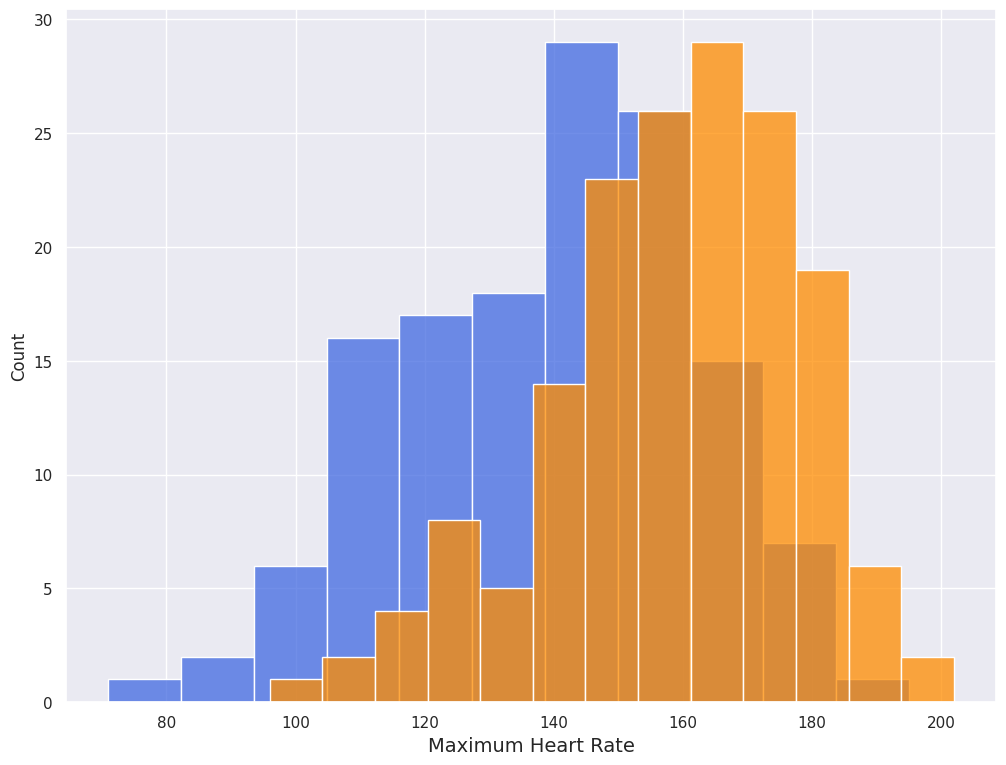

In [7]:
plt.figure().set_size_inches(12, 9)

sns.histplot(df['thalach'][df['target']==0], color='royalblue')
sns.histplot(df['thalach'][df['target']==1], color='darkorange');

plt.xlabel('Maximum Heart Rate', fontsize=14);

In [8]:
from sklearn.linear_model import LogisticRegression

X = np.reshape(df['thalach'].values, (len(df), 1))
y = df['target']

# Define the model object
clf = LogisticRegression(solver='lbfgs', random_state=314)

# Train (fit) the model using the training sample
clf.fit(X, y)

# Make predictions on the test sample
preds = clf.predict(X)

Text(0.5, 0, 'Maximum Heart Rate')

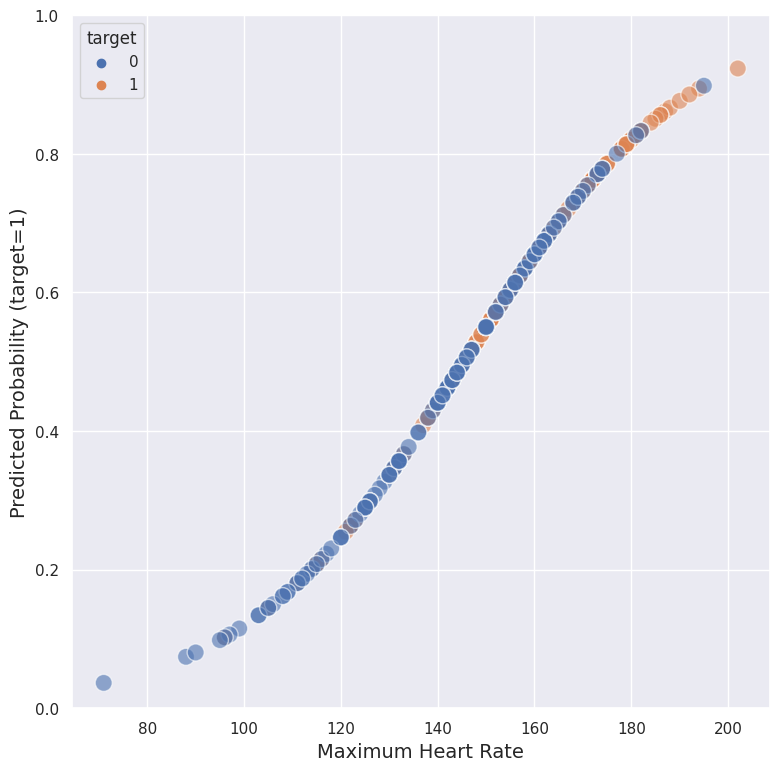

In [9]:
yhat = clf.predict_proba(X)[:, 1]

plt.figure().set_size_inches(9, 9)

sns.scatterplot(x=df['thalach'], y=yhat, hue=df['target'], s=150, alpha=.6)

plt.ylim((0, 1))
plt.ylabel('Predicted Probability (target=1)', fontsize=14)
plt.xlabel('Maximum Heart Rate', fontsize=14)

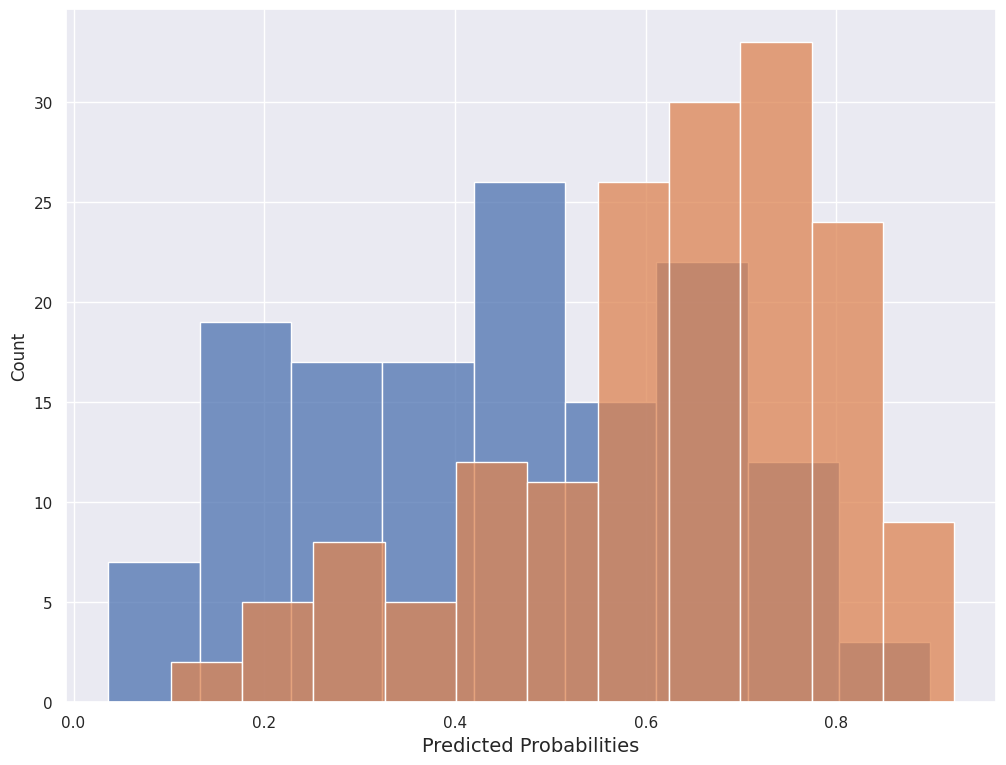

In [14]:
plt.figure().set_size_inches(12, 9)

sns.histplot(yhat[df['target']==0], label='0')
sns.histplot(yhat[df['target']==1], label='1');

plt.xlabel('Predicted Probabilities', fontsize=14);

### Receiver Operating Characteristic (ROC) Curve

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thres = roc_curve(y, yhat)
auc = roc_auc_score(y, preds)

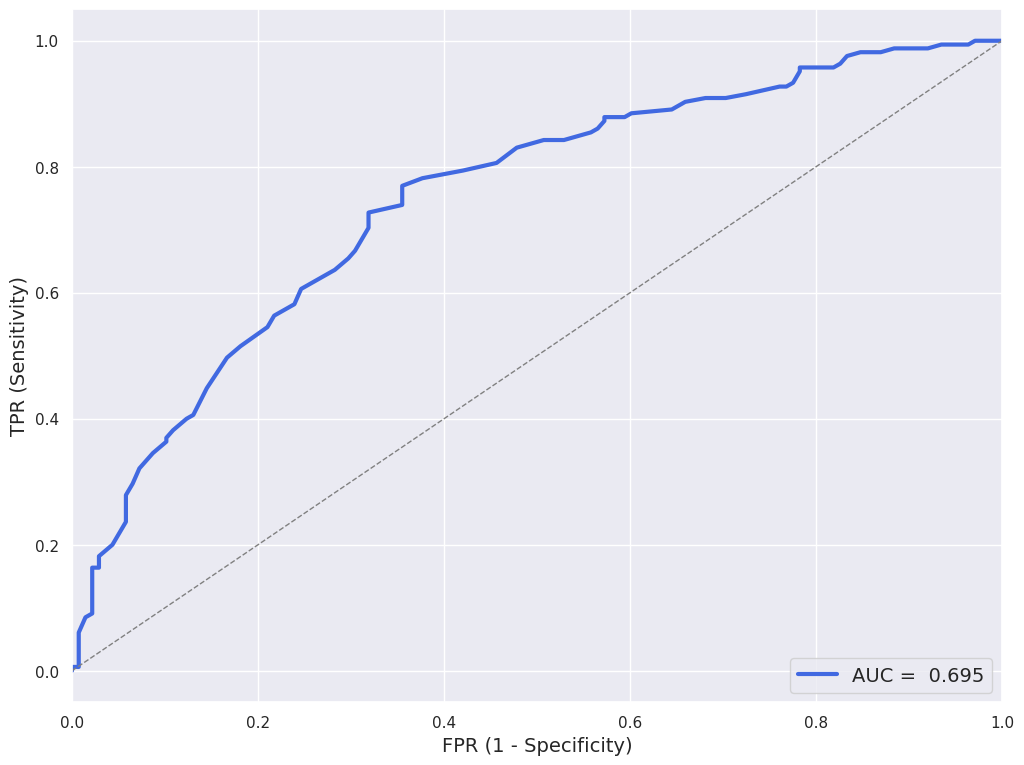

In [16]:
sns.set(style='darkgrid')

plt.figure().set_size_inches(12, 9)

plt.plot(fpr, tpr, color='royalblue', lw=3, label=f'AUC = {auc: 0.3f}')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])

plt.xlabel('FPR (1 - Specificity)', fontsize = 14)
plt.ylabel('TPR (Sensitivity)', fontsize = 14)
plt.legend(loc='lower right', fontsize = 14);

https://nbconvert.readthedocs.io/en/latest/usage.html